In [2]:
import pandas as pd
import pyreadstat as st
import pingouin as pg
import numpy as np

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\problem_set_7\firmas.dta"

df, meta = st.read_dta(path)
df.head()

,firm,ebitass,rotc,group
0,1,0.158,0.182,0
1,2,0.210,0.206,0
2,3,0.207,0.188,0
3,4,0.280,0.236,0
4,5,0.197,0.193,0


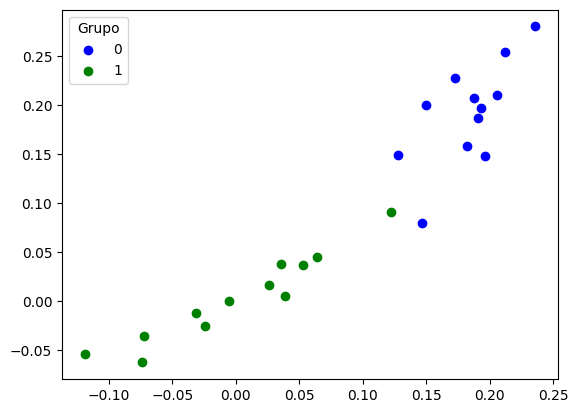

In [3]:
import matplotlib.pyplot as plt
colors = {0: 'blue', 1: 'green'}

for group, color in colors.items():
    subset = df[df['group'] == group]
    plt.scatter(subset['rotc'], subset['ebitass'], c=color, label=group)

plt.legend(title='Grupo')
plt.show()

In [9]:
df[df['group']==0].describe()

,firm,ebitass,rotc,group
count,12.000000,12.000000,12.000000,12.0
mean,6.500000,0.191333,0.183500,0.0
std,3.605551,0.053241,0.030219,0.0
min,1.000000,0.079000,0.128000,0.0
25%,3.750000,0.155750,0.167250,0.0
50%,6.500000,0.198500,0.189500,0.0
75%,9.250000,0.214250,0.198500,0.0
max,12.000000,0.280000,0.236000,0.0


In [5]:
df[df['group']==1].describe()

,firm,ebitass,rotc,group
count,12.000000,12.000000,12.000000,12.0
mean,18.500000,0.003333,0.001250,1.0
std,3.605551,0.044919,0.068521,0.0
min,13.000000,-0.063000,-0.119000,1.0
25%,15.750000,-0.028500,-0.041250,1.0
50%,18.500000,0.002500,0.010500,1.0
75%,21.250000,0.036500,0.042500,1.0
max,24.000000,0.091000,0.122000,1.0


In [3]:
from statsmodels.multivariate.manova import MANOVA
# Realizar MANOVA
manova = MANOVA.from_formula('ebitass + rotc ~ group', data=df)

# Obtener el resumen
print(manova.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.1053 2.0000 21.0000 89.2034 0.0000
         Pillai's trace 0.8947 2.0000 21.0000 89.2034 0.0000
 Hotelling-Lawley trace 8.4956 2.0000 21.0000 89.2034 0.0000
    Roy's greatest root 8.4956 2.0000 21.0000 89.2034 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
         group          Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.1952 2.0000 21.0000 43.3014 0.0000
         Pillai's trace 0.8048 2.0000 21.0000 43.3014 0.0000
 Hotelling-Lawley trace 4.1239 2.0000 21.0

In [20]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score


X = df[['ebitass', 'rotc']]
y = df['group']


# Crear el modelo LDA
lda = LDA()

# Ajustar el modelo a todos los datos
model = lda.fit(X, y)

# # Predecir utilizando el mismo dataset
# y_pred = lda.predict(X)

# # Calcular la matriz de confusión
# conf_matrix = confusion_matrix(y, y_pred)

# # Calcular la precisión del modelo
# accuracy = accuracy_score(y, y_pred)

# # Mostrar los resultados
# print(f'Matriz de Confusión:\n{conf_matrix}')
# print(f'Precisión: {accuracy:.2f}')

# # Mostrar los coeficientes (similar a los loadings en Stata)
# print(f'Coeficientes del modelo LDA: \n{lda.coef_}')

In [21]:
model.means_

array([[0.19133334, 0.1835    ],
       [0.00333333, 0.00125   ]])

In [29]:
model.scalings_

array([[-15.09191758],
       [ -5.76850146]])

In [27]:
means = model.means_

# Matriz de covarianzas inversa
cov_inv = np.linalg.inv(np.cov(X.T))

# Prior probabilities
priors = model.priors_

# Calcular la constante para cada clase
intercepts = []
for i, mean in enumerate(means):
    # Término cuadrático
    intercept = -0.5 * np.dot(np.dot(mean, cov_inv), mean.T)
    # Agregar el logaritmo de las probabilidades a priori
    intercept += np.log(priors[i])
    intercepts.append(intercept)

# Mostrar los interceptos
print("Interceptos (constantes) para cada clase:")
print(intercepts)

Interceptos (constantes) para cada clase:
[-2.283522918446424, -0.6952829257829266]


In [30]:
group_mean = np.dot(model.priors_, model.means_)

# Calcular la constante
constant = np.dot(group_mean, model.scalings_)

# Invertir el signo si es necesario
constante = -constant

# Mostrar el resultado
print("Constante (intercepto):", constante)

Constante (intercepto): [2.00181198]


In [8]:
# Obtener los priors (probabilidades a priori)
priors = lda.priors_

# Mostrar los priors
print(f'Priors: {priors}')

Priors: [0.5 0.5]


In [ ]:
# # Crear el modelo LDA con priors personalizados
# lda_custom = LDA(priors=[0.6, 0.4])  # Priors para dos clases

# # Ajustar el modelo
# lda_custom.fit(X, y)

# # Verificar los priors personalizados
# print(f'Priors personalizados: {lda_custom.priors_}')

In [15]:
# Predicciones (valores clasificados)
y_pred = lda.predict(X)

# Probabilidades asociadas a cada clase
y_prob = lda.predict_proba(X)

# Mostrar los valores clasificados, valores verdaderos y probabilidades
resultados = pd.DataFrame({
    'Valor Verdadero': y,
    'Valor Clasificado': y_pred,
    'Probabilidad Clase 0': y_prob[:, 0],
    'Probabilidad Clase 1': y_prob[:, 1]
})

pd.DataFrame(resultados)

,Valor Verdadero,Valor Clasificado,Probabilidad Clase 0,Probabilidad Clase 1
0,0,0,0.996207,3.793333e-03
1,0,0,0.999895,1.050733e-04
2,0,0,0.999812,1.876161e-04
3,0,0,0.999999,8.814227e-07
4,0,0,0.999698,3.015664e-04
5,0,0,0.999919,8.122710e-05
6,0,0,0.995023,4.977264e-03
7,0,0,0.999993,6.944646e-06
8,0,0,0.537280,4.627201e-01
9,0,0,0.978777,2.122253e-02


In [17]:
# Obtener coeficientes de las funciones discriminantes
coeficientes = lda.coef_

# Obtener interceptos (puntos de corte) de las funciones discriminantes
interceptos = lda.intercept_

# Obtener la función de decisión (distancia proyectada en la función discriminante)
decision_values = lda.decision_function(X)

# Mostrar los resultados
print("Coeficientes de las funciones discriminantes:")
print(coeficientes)

print("\nInterceptos de las funciones discriminantes:")
print(interceptos)

print("\nValores proyectados en la función discriminante (decision function):")
print(decision_values)

Coeficientes de las funciones discriminantes:
[[-58.68627869 -22.4313367 ]]

Interceptos de las funciones discriminantes:
[7.7842259]

Valores proyectados en la función discriminante (decision function):
[ -5.57070975  -9.1607476   -8.58092507 -13.94172769  -8.10621888
  -9.41818034  -5.29788533 -11.87753268  -0.14939682  -3.83124109
  -7.31773065  -7.47449389   9.18383268   4.48265913   4.7466193
  13.14138046  13.62261416   7.89638258   6.61597237  -0.29284846
  11.51198802   3.70773764   9.84842127   6.26203063]


In [18]:
print("Coeficientes de las funciones discriminantes para cada grupo:")
for i, coef in enumerate(coeficientes):
    print(f"Grupo {i}: {coef}")

print("\nInterceptos (constantes) para cada grupo:")
for i, intercept in enumerate(interceptos):
    print(f"Grupo {i}: {intercept}")

Coeficientes de las funciones discriminantes para cada grupo:
Grupo 0: [-58.68627869 -22.4313367 ]

Interceptos (constantes) para cada grupo:
Grupo 0: 7.784225903466156


In [31]:
import pandas as pd
import pyreadstat as st
import pingouin as pg
import numpy as np

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\problem_set_7\muestra_engh.dta"

df2, meta = st.read_dta(path)
df2.head()

,region,subregion,hogar,cap1,cap2,cap3,cap4,cap5,cap6,cap7,cap8,cap9,gctotal,intotal
0,1.0,1A,1037701.0,306.350006,57.799999,57.200001,60.830002,134.000000,121.169998,100.750000,0.0,0.000000,838.099976,1147.000000
1,1.0,1A,1053381.0,508.559998,5.000000,55.150002,23.370001,77.940002,171.589996,53.200001,0.0,11.530000,906.340027,2350.000000
2,1.0,1B,1066431.0,211.539993,15.000000,53.000000,9.330000,2.380000,122.400002,57.869999,40.0,0.000000,511.519989,1133.329956
3,1.0,1B,1039321.0,91.470001,25.000000,33.450001,3.600000,0.000000,43.480000,4.000000,0.0,10.000000,211.000000,255.339996
4,1.0,1A,1049481.0,337.720001,70.000000,97.620003,0.000000,0.000000,1060.880005,179.330002,0.0,40.119999,1785.670044,2325.489990


In [40]:
x1 = df2.iloc[:,3:12]

x2 = pd.concat([x1,df2.iloc[:,0]], axis=1)
display(x1.head(1), x2.head(1))

,cap1,cap2,cap3,cap4,cap5,cap6,cap7,cap8,cap9
0,306.350006,57.799999,57.200001,60.830002,134.0,121.169998,100.75,0.0,0.0


,cap1,cap2,cap3,cap4,cap5,cap6,cap7,cap8,cap9,region
0,306.350006,57.799999,57.200001,60.830002,134.0,121.169998,100.75,0.0,0.0,1.0


In [42]:
from statsmodels.multivariate.manova import MANOVA
# Realizar MANOVA
manova = MANOVA.from_formula('cap1 + cap2 + cap3 + cap4 + cap5 + cap6 + cap7 + cap8 + cap9 ~ region', data=x2)

# Obtener el resumen
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.6621 9.0000 411.0000 23.3071 0.0000
         Pillai's trace 0.3379 9.0000 411.0000 23.3071 0.0000
 Hotelling-Lawley trace 0.5104 9.0000 411.0000 23.3071 0.0000
    Roy's greatest root 0.5104 9.0000 411.0000 23.3071 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         region         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8862 9.0000 411.0000  5.8646 0.0000
         Pillai's trace 0.1138 9.0000 411.0000  5.8646 0.0000
 Hotelling-Lawley trace 0.